In [1]:
%pylab inline

import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import math

import seaborn as sns
sns.set_context("talk")

# programatically instantiate figures to latex
save_fig = False
# modify to save figure in a different location
fig_name = "contour_plot.pdf"

Populating the interactive namespace from numpy and matplotlib


## This notebook plots the lower bound from claim 4.4 of the paper.

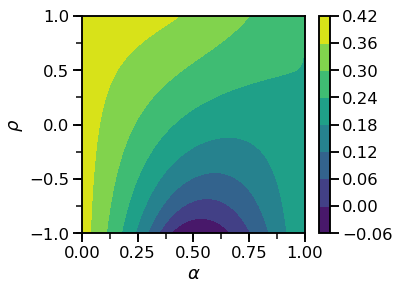

In [2]:
sigma_w = 1
sigma_p = 1
sigma_e_p = .1
sigma_e_w = .5

def lower_bound(alpha, rho):
    sigma_y_sq = alpha**2 * sigma_w**2 \
                    + (1-alpha)**2 * sigma_p**2 \
                    + 2* rho *alpha * (1-alpha)* sigma_w* sigma_p
    sigma_tilde_sq = (alpha**2 * sigma_e_w**2 
                         + (1-alpha)**2 * sigma_e_p**2 ) \
    
    E_u_opt = np.sqrt(sigma_y_sq) / np.sqrt(2 * math.pi)
    
    c = 2
    additive_bound = E_u_opt * (1 - (c * sigma_tilde_sq / (sigma_tilde_sq + sigma_y_sq)))

    return additive_bound

lb_v = np.vectorize(lower_bound) 

# make meshgrid of alphas, rhos to plot over
delta = 0.025
alphas = np.arange(0.0, 1.0+delta, delta)
rhos = np.arange(-1.0, 1.0+delta, delta)
alphas_grid, rhos_grid = np.meshgrid(alphas, rhos)


# make figure
fig, ax = plt.subplots(figsize=(5,4))

cp = ax.contourf(alphas_grid, 
                 rhos_grid, 
                 lb_v(alphas_grid, rhos_grid),

                )
plt.colorbar(cp)


# labels and formatting
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\rho$')

ax.set_xticks(np.linspace(0,1,num=5));
ax.set_xticks(np.linspace(0,1,num=9),minor=True);
ax.set_yticks(np.linspace(-1,1,num=5));
ax.set_yticks(np.linspace(-1,1,num=9),minor=True);

if save_fig:
    plt.savefig(fig_name,bbox_inches='tight')

